### Juan Jose Montoya Sanchez cc:1004998829
Una barra conductora de calor, homogénea, con longitud L, densidad ρ, área de sección transversal A, y capacidad calorífica a presión constante Cp, presenta una distribución no uniforme de temperatura al conectar uno de sus extremos (x = 0) a un reservorio de alta temperatura (T0) y el otro extremo (x = L) a un reservorio de baja temperatura (TL). Inicialmente, la temperatura varía linealmente desde un extremo al otro según la ecuación $ T_{i} = T_{0} + \frac{T_{L} - T_{0}}{L}x $ .

(a) La barra es retirada de ambos reservorios y luego aislada térmicamente con paredes adiabáticas a presión constante. Un flujo de calor interno llevará a la barra a un estado final con una distribución uniforme de temperatura $ T_{f} = \frac{T_{L} + T_{0}}{2} $. En este caso, el cambio en la entropía del universo está dado por:
$$
 \Delta S = C_{p} \Biggl[ 1-ln(\frac{T_{L}}{T_{f}}) + \frac{T_{0}}{T_{o}-T_{L}}ln(\frac{T_{0}}{T_{L}}) \Biggr] 
$$

(b) Ahora, en el caso en que a la barra en estado uniforme se le retira solo el reservorio caliente, el cambio en la entropía del universo está dado por:
$$
\Delta S = C_{p}\Biggl( 1+\frac{T_{0}-T_{L}}{2T_{L}}-\frac{T_{0}}{T_{0}-T_{L}}ln(\frac{T_{0}}{T_{L}})  \Biggr) 
$$

(c) Usando Python, elabore diagramas de ΔS versus TL para diferentes valores de L, T0 y Cp (capacidades caloríficas de barras conductoras de diversos materiales, como Al, Cu, Fe, etc.) y para las dos situaciones descritas en los apartados (a) y (b). Compare y discuta los resultados obtenidos.

## Planteamientos
Ya tenemos la teoria y las ecuaciones que describen los fenomenos, sin embargo aun requerimos de decidir sobre algunos parametros que no vienen definidos en el ejercicio, siendo asi, vamos a tomar 3 valores para la temperatura del reservorio caliente [400,500,600] y 3 valores para la capacidad calorifica [900,385,450].

Para el reservorio frio tomaremos un rango tal que su valor maximo sea menor que el valor minimo del reservorio caliente. Siendo asi un rango desde 100k hasta 300k.

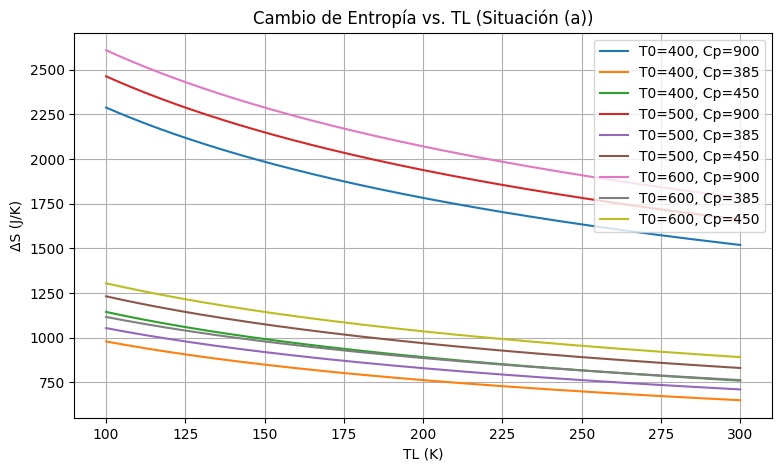

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T0_vals = [400, 500, 600]  # Diferentes temperaturas del reservorio caliente en Kelvin
Cp_vals = [900, 385, 450]  # Capacidad calorífica específica (J/(kg·K)) para Al, Cu, Fe respectivamente

# Rango de TL
TL = np.linspace(100, 300, 500)

# Funciones para calcular el cambio de entropía
def delta_S_a(T0, Cp, TL):
    Tf = (T0 + TL) / 2
    return Cp * (1 - np.log(TL / Tf) + ((T0) / (T0 - TL)) * np.log(T0 / Tf))

def delta_S_b(T0, Cp, TL):
    return Cp * (1 + (T0 - TL) / (2 * TL) - (T0)/(T0 - TL) * np.log(T0 / TL))

# Generar gráficas para la situación (a)
plt.figure(figsize=(9, 5))
for T0 in T0_vals:
    for Cp in Cp_vals:
        DS_a = delta_S_a(T0, Cp, TL)
        plt.plot(TL, DS_a, label=f'T0={T0}, Cp={Cp}')

plt.xlabel('TL (K)')
plt.ylabel('ΔS (J/K)')
plt.title('Cambio de Entropía vs. TL (Situación (a))')
plt.legend()
plt.grid(True)
plt.show()



## Analisis (situacion a)
En la grafica podemos apreciar como todas las muestran tener cambios mas releventes en "su punto de corte con el eje y" que en la pendiente. Tambien podemos apreciar que las 3 curvas que mas se diferencian del resto tienen en comun el valor de Cp = 900. Lo cual nos sugiere que la capacidad calorifica a presion constante es mas relevante para variar el comportamiento de el cambio de entropia.

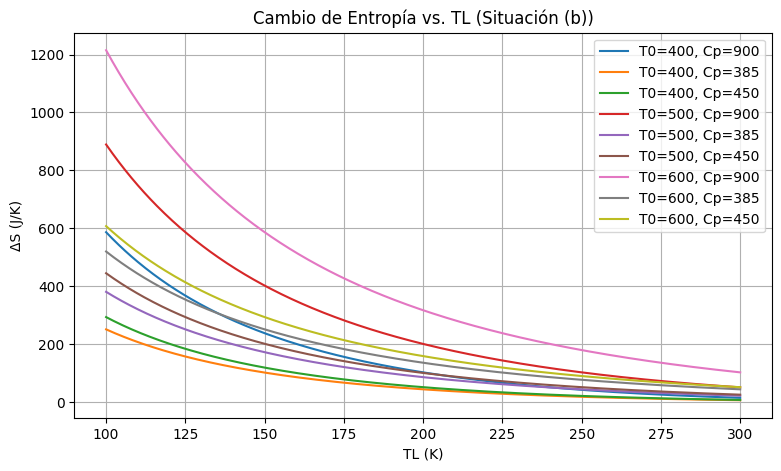

In [8]:
# Generar gráficas para la situación (b)
plt.figure(figsize=(9, 5))
for T0 in T0_vals:
    for Cp in Cp_vals:
        DS_b = delta_S_b(T0, Cp, TL)
        plt.plot(TL, DS_b, label=f'T0={T0}, Cp={Cp}')

plt.xlabel('TL (K)')
plt.ylabel('ΔS (J/K)')
plt.title('Cambio de Entropía vs. TL (Situación (b))')
plt.legend()
plt.grid(True)
plt.show()

## Analisis (situacion b)
En este caso vemos como todas las curvas muestran "converger" conforme la temperatura del reservorio frio "$T_{L}$" aumenta. Tambien podemos apreciar como en la situacion a, las curvas que tienen valores mas altos tienen en comun el valor de Cp = 900. Aunque en este caso no es tan directo para determinar el comportamiento de la curva.

## Conclusion
Ambas situaciones son distintas tanto en comportamineto, como en valores. Aunque si es claro que para todos los casos de ambas situaciones el aumentar la temperatura del reservorio frio disminuye el cambio de entropia. Esto a nivel fisico se puede entender de forma logica como que al reducir la diferencia entre ambos reservorios, se reduce la cantidad de combinaciones que describe la entropia.

Tambien es de destacar que la situacion b, presenta un comportamineto convergente mientras la situacion a no lo hace.